<a href="https://colab.research.google.com/github/godspowerufot/HCI-Assingment/blob/main/gas_flare_68ef1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING THE INFLUENCE OF GAS FLARE ON CHRONIC OBSTRUCTIVE PULMONARY DISEASE  BASED ON LINEAR REGRESSION REGRESSION ANALYSIS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# df = pd.read_excel(r'/kaggle/working/copd--cases.xlsx')
# df = pd.read_excel(r'/kaggle/input/copd-missing-values/copd_.xlsx')
df = pd.read_excel('/copd-gas-flare.xlsx')

In [ ]:
df.head(10)

,year,gas flare,cases
0,43101,878.0,4.0
1,43102,464.0,1.0
2,43103,890.0,NaN
3,43104,664.0,4.0
4,43105,507.0,NaN
5,43106,1101.0,2.0
6,43107,417.0,2.0
7,43108,1059.0,5.0
8,43109,1069.0,NaN
9,43110,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2006 non-null   int64  
 1   gas flare  1969 non-null   float64
 2   cases      1426 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.1 KB


In [8]:
df.describe()

,year,gas flare,cases
count,2006.00000,1969.000000,1426.000000
mean,44103.50000,958.723210,3.006311
std,579.22664,346.770271,1.426797
min,43101.00000,1.000000,1.000000
25%,43602.25000,666.000000,2.000000
50%,44103.50000,972.000000,3.000000
75%,44604.75000,1252.000000,4.000000
max,45106.00000,1556.000000,5.000000


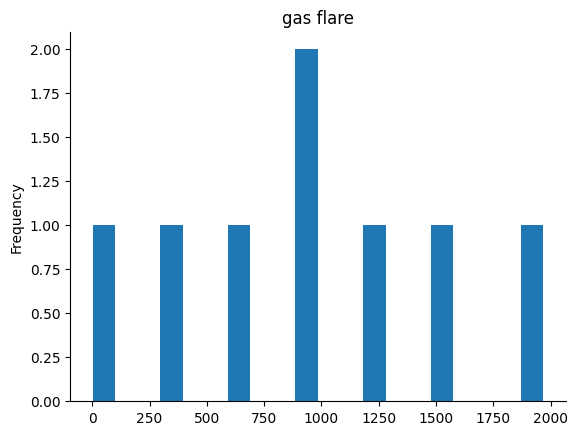

In [7]:
from matplotlib import pyplot as plt
_df_1['gas flare'].plot(kind='hist', bins=20, title='gas flare')
plt.gca().spines[['top', 'right',]].set_visible(False)

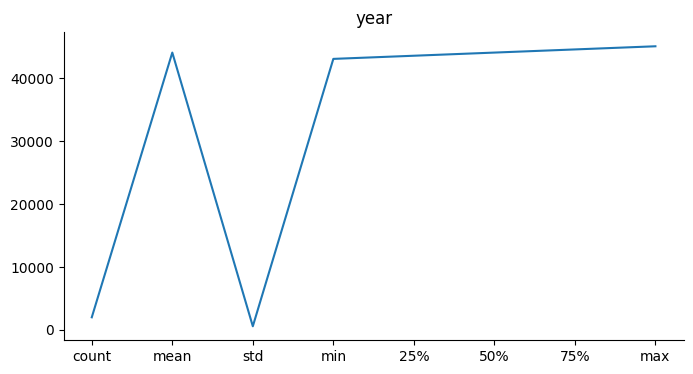

In [6]:
from matplotlib import pyplot as plt
_df_8['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

### checking for null values


In [ ]:
df.isna().sum()


year           0
gas flare     37
cases        580
dtype: int64

replacing nul values withaverages in the data

gas_flare_mean = round(df.gas_flare.mean())
cases_mean = round(df.cases.mean())
df.gas_flare = df.gas_flare.fillna(gas_flare_mean)
df.cases = df.cases.fillna(cases_mean)

#check for null values
df.isna().sum()

In [ ]:
df.to_csv('/kaggle/working/copd-flare.csv', index=False)

#### checking for duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
# df['gas flare'].hist(bins=50)

### checking for outliers in the copd cases.

<Axes: >

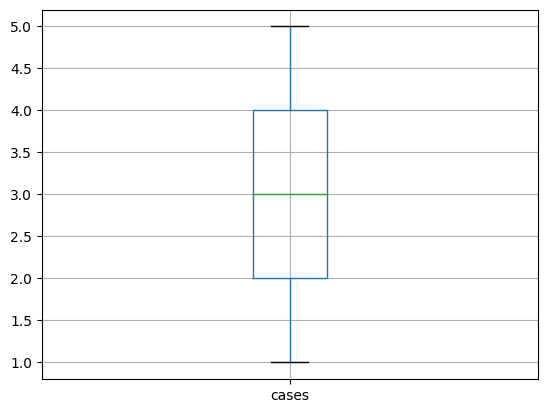

In [ ]:
df[['cases']].boxplot()

<Axes: >

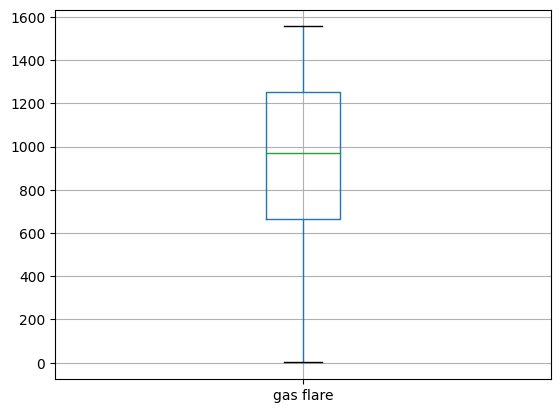

In [ ]:
df[['gas flare']].boxplot()

There are no outlier values in the dataset. The plot also shows a balanced distribution of copd cases across the data.


In [ ]:
df['date'] = pd.to_datetime(df.date)
df['year'] = df['date'].dt.year

In [ ]:
df

,year,gas flare,cases
0,43101,878.0,4.0
1,43102,464.0,1.0
2,43103,890.0,NaN
3,43104,664.0,4.0
4,43105,507.0,NaN
...,...,...,...
2001,45102,697.0,2.0
2002,45103,1225.0,2.0
2003,45104,690.0,3.0
2004,45105,1166.0,5.0


# Average COPD cases by year|

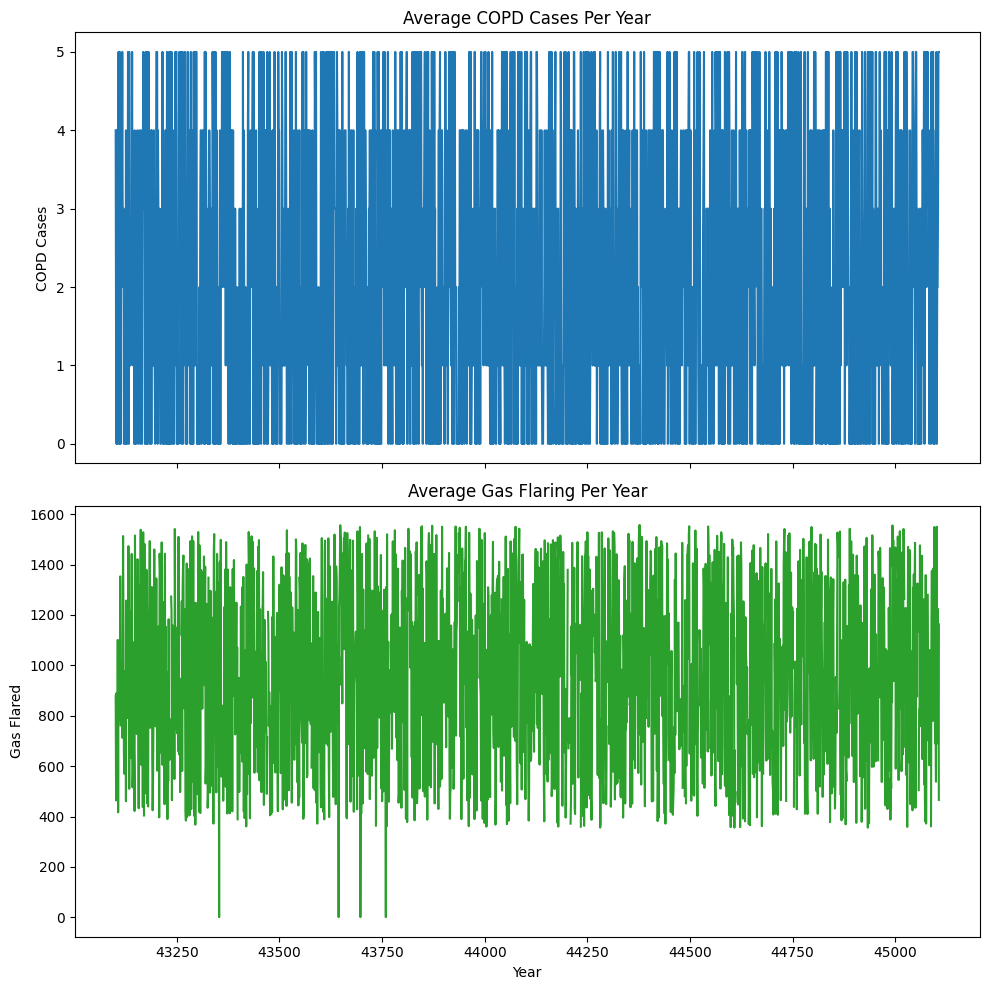

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and two subplots (axes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot the average COPD cases on the first subplot
ax1.set_ylabel('COPD Cases')
ax1.plot(avg_cases_per_year.index, avg_cases_per_year, color='tab:blue', label='COPD Cases')
ax1.set_title('Average COPD Cases Per Year')

# Plot the average gas flare on the second subplot
ax2.set_xlabel('Year')
ax2.set_ylabel('Gas Flared')
ax2.plot(avg_gas_flared.index, avg_gas_flared, color='tab:green', label='Gas Flared')
ax2.set_title('Average Gas Flaring Per Year')

# Show the plot
plt.tight_layout()
plt.show()


The plot denotes a yearly increase of COPD cases by year. This could mean that there are a number of unattended COPD cases or a continous increase in gas flare.

### correlation Analysis


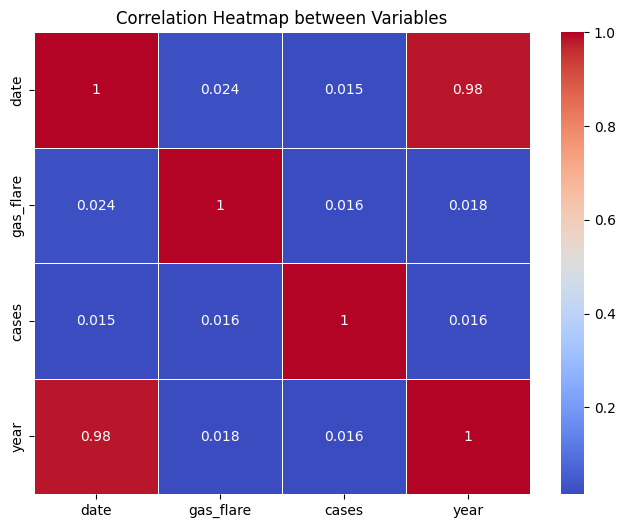

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Variables')
plt.show()

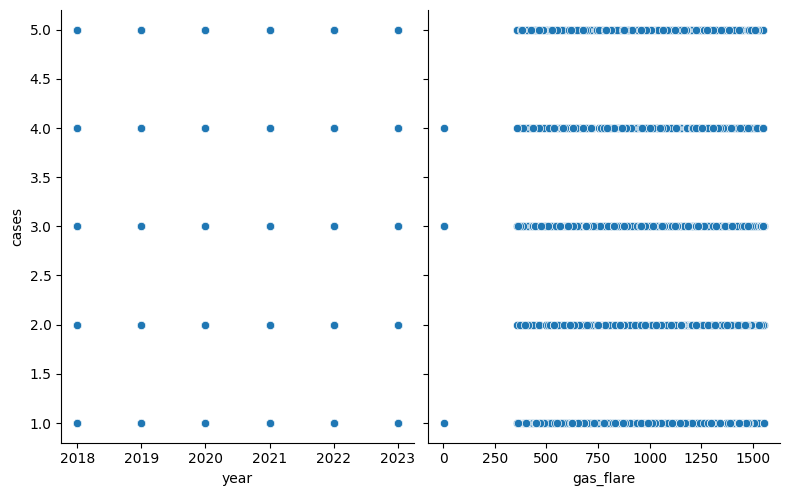

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, x_vars=['year','gas_flare'], y_vars='cases', height=5, aspect=0.8, kind='scatter')
plt.show()

In [ ]:
df.describe()

,date,gas_flare,cases,year
count,2006,2006.000000,2006.000000,2006.000000
mean,2020-09-29 12:00:00,958.728315,3.004487,2020.269192
min,2018-01-01 00:00:00,1.000000,1.000000,2018.000000
25%,2019-05-17 06:00:00,671.250000,2.000000,2019.000000
50%,2020-09-29 12:00:00,959.000000,3.000000,2020.000000
75%,2022-02-12 18:00:00,1246.750000,4.000000,2022.000000
max,2023-06-29 00:00:00,1556.000000,5.000000,2023.000000
std,NaN,343.555748,1.202856,1.598727


### scatter plot

In [ ]:
sns.scatterplot(data=df, x='gas_flare', y='cases')

NameError: name 'sns' is not defined

In [ ]:
# Features
X = df[['year', 'gas_flare']]


# Target variable
y = df['cases']

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

y_pred_linear

array([3.05898058, 2.95321271, 2.99471021, 2.96653817, 2.98630151,
       2.97210499, 3.06242179, 2.91247965, 2.92602093, 2.91499134,
       3.03298747, 3.02037571, 2.97341544, 2.97811121, 3.01671866,
       2.96795782, 3.01251302, 2.95599613, 3.01660688, 3.02419527,
       3.04238158, 3.06760769, 3.06198498, 3.01229719, 2.97871569,
       3.05215405, 2.95021346, 3.00945274, 2.86290106, 2.98559554,
       2.99160176, 3.05177312, 2.95981827, 2.94666305, 3.04996997,
       2.97407581, 2.99170839, 2.8969168 , 2.93017068, 3.02671211,
       2.94890044, 2.95446727, 2.99651079, 2.95266927, 2.9249289 ,
       2.95435807, 2.99345822, 2.91793984, 3.011967  , 3.05908979,
       2.99755466, 2.91526563, 3.01333334, 2.94742491, 2.9730904 ,
       2.995368  , 3.01147173, 2.9858088 , 3.0337519 , 3.0447815 ,
       2.97204911, 2.98662912, 3.0305291 , 2.94311264, 3.0346281 ,
       2.93355601, 2.97958675, 2.95458162, 2.98755606, 2.92913196,
       2.99209189, 2.96877813, 2.99143666, 2.9972219 , 3.04095

### model building

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# ElasticNet Regression
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)

# RandomForest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


# RandomForest Regression
lgr_model = LogisticRegression()
lgr_model.fit(X_train_scaled, y_train)
y_pred_lgr = lgr_model.predict(X_test_scaled)

In [ ]:
y_test

1805    5.0
526     3.0
393     3.0
1401    1.0
433     1.0
       ... 
938     4.0
1403    3.0
1138    3.0
1037    4.0
654     1.0
Name: cases, Length: 402, dtype: float64

In [ ]:
# linear_model.score(y_pred, y_test)

In [ ]:
# Compare models
models = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'ElasticNet Regression': y_pred_elastic,
    'Random Forest Regressor': y_pred_rf,
    'Logistic Regression': y_pred_lgr

}

# Evaluate each model and store results
results = {}
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Print model comparison results
for model_name, result in results.items():
    print(f'{model_name}:\n Mean Squared Error: {result["MSE"]:.5f}, R-squared: {result["R2"]:.4f}\n')

Linear Regression:
 Mean Squared Error: 1.40691, R-squared: -0.0115

Ridge Regression:
 Mean Squared Error: 1.40690, R-squared: -0.0115

Lasso Regression:
 Mean Squared Error: 1.40089, R-squared: -0.0072

ElasticNet Regression:
 Mean Squared Error: 1.40089, R-squared: -0.0072

Random Forest Regressor:
 Mean Squared Error: 1.64153, R-squared: -0.1802

Logistic Regression:
 Mean Squared Error: 1.39801, R-squared: -0.0051



In [ ]:
# Compare models
models = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'ElasticNet Regression': y_pred_elastic,
    'Random Forest Regressor': y_pred_rf,
    'Logistic Regression': y_pred_lgr
}

# Evaluate each model and store results
results = {}
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'RMSE':rmse, 'R2': r2}

# Print model comparison results
for model_name, result in results.items():
    print(f'{model_name}:\n Mean Squared Error: {result["MSE"]:.5f}, RMSE: {result["RMSE"]:.4f}, R-squared: {result["R2"]:.4f}\n')

Linear Regression:
 Mean Squared Error: 1.40691, RMSE: 1.1861, R-squared: -0.0115

Ridge Regression:
 Mean Squared Error: 1.40690, RMSE: 1.1861, R-squared: -0.0115

Lasso Regression:
 Mean Squared Error: 1.40089, RMSE: 1.1836, R-squared: -0.0072

ElasticNet Regression:
 Mean Squared Error: 1.40089, RMSE: 1.1836, R-squared: -0.0072

Random Forest Regressor:
 Mean Squared Error: 1.64153, RMSE: 1.2812, R-squared: -0.1802

Logistic Regression:
 Mean Squared Error: 1.39801, RMSE: 1.1824, R-squared: -0.0051



In [ ]:
y_pred_linear

array([3.05898058, 2.95321271, 2.99471021, 2.96653817, 2.98630151,
       2.97210499, 3.06242179, 2.91247965, 2.92602093, 2.91499134,
       3.03298747, 3.02037571, 2.97341544, 2.97811121, 3.01671866,
       2.96795782, 3.01251302, 2.95599613, 3.01660688, 3.02419527,
       3.04238158, 3.06760769, 3.06198498, 3.01229719, 2.97871569,
       3.05215405, 2.95021346, 3.00945274, 2.86290106, 2.98559554,
       2.99160176, 3.05177312, 2.95981827, 2.94666305, 3.04996997,
       2.97407581, 2.99170839, 2.8969168 , 2.93017068, 3.02671211,
       2.94890044, 2.95446727, 2.99651079, 2.95266927, 2.9249289 ,
       2.95435807, 2.99345822, 2.91793984, 3.011967  , 3.05908979,
       2.99755466, 2.91526563, 3.01333334, 2.94742491, 2.9730904 ,
       2.995368  , 3.01147173, 2.9858088 , 3.0337519 , 3.0447815 ,
       2.97204911, 2.98662912, 3.0305291 , 2.94311264, 3.0346281 ,
       2.93355601, 2.97958675, 2.95458162, 2.98755606, 2.92913196,
       2.99209189, 2.96877813, 2.99143666, 2.9972219 , 3.04095

In [ ]:
# df['copd cases'] = df['copd cases'].apply(lambda x: np.nan if x > 2000 else x)
df['copd cases'] = df['copd cases'].apply(lambda x: 0 if (x >= 313  and x <= 575) else x)

KeyError: 'copd cases'

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

## Handling missing values

In [ ]:
mean_copd_cases = round(df['copd cases'].mean())
df['copd cases'] = df['copd cases'].fillna(mean_copd_cases)

In [ ]:
df[df['copd cases'] < 1].shape

In [ ]:
df.to_excel('/kaggle/working/copd_.xlsx', index=False)

drop or delete
replace with mean
